## K-Means Clustering

**Overview**<br>
This is to answer a question related to cricket

The steps are broadly:
1. Read and understand the data
2. Clean the data
3. Prepare the data for modelling
4. Modelling
5. Final analysis and reco

# 1. Read and visualise the data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
# read the dataset
cricket = pd.read_csv("/workspaces/Unsupervised-Learning-Clustering/data/Cricket.csv", sep=",", encoding="ISO-8859-1", header=0)
cricket.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [4]:
# basics of the df
cricket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [6]:
cricket.shape

(79, 13)

# 2. Clean the data

In [5]:
# drop all rows having missing values
cricket_df = cricket.dropna()
cricket_df.shape

(79, 13)

In [7]:
cricket.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [9]:
cricket_df = cricket[['Ave', 'SR']]
cricket_df.head()

,Ave,SR
0,44.83,86.23
1,41.98,78.86
2,42.03,80.39
3,32.36,91.20
4,33.37,78.96


# 3. Prepare the data for modelling

In [10]:
# instantiate
scaler = StandardScaler()

# fit_transform
cricket_df_scaled = scaler.fit_transform(cricket_df)
cricket_df_scaled.shape

(79, 2)

In [ ]:
cricket_df_scaled

In [12]:
cricket_df_scaled = pd.DataFrame(cricket_df_scaled)
cricket_df_scaled.columns = ['Ave', 'SR']
cricket_df_scaled.head()

,Ave,SR
0,1.072294,0.703152
1,0.587725,-0.044139
2,0.596226,0.110997
3,-1.047909,1.207091
4,-0.876185,-0.034000


# 4. Modelling

In [32]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=10, random_state=100)
kmeans.fit(cricket_df_scaled)

KMeans(max_iter=10, n_clusters=4, random_state=100)

In [33]:
kmeans.labels_

array([2, 2, 2, 3, 1, 2, 2, 2, 1, 2, 2, 2, 3, 0, 1, 0, 1, 2, 2, 2, 2, 1,
       1, 2, 3, 0, 2, 3, 1, 2, 1, 1, 2, 1, 0, 1, 1, 2, 0, 2, 1, 1, 0, 1,
       1, 1, 2, 1, 1, 2, 3, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 3, 2, 2, 0, 2,
       2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1], dtype=int32)

In [34]:
# assign the label
cricket['cluster_id'] = kmeans.labels_
cricket.head(10)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,cluster_id
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,2
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,2
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,3
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1
5,Inzamam-ul-Haq (Asia/PAK),1991-2007,378,350,53,11739,137*,39.52,15812,74.24,10,83,20,2
6,JH Kallis (Afr/ICC/SA),1996-2014,328,314,53,11579,139,44.36,15885,72.89,17,86,17,2
7,SC Ganguly (Asia/INDIA),1992-2007,311,300,23,11363,183,41.02,15416,73.70,22,72,16,2
8,R Dravid (Asia/ICC/INDIA),1996-2011,344,318,40,10889,153,39.16,15284,71.24,12,83,13,1
9,BC Lara (ICC/WI),1990-2007,299,289,32,10405,169,40.48,13086,79.51,19,63,16,2


In [36]:
starters = ['V Kohli', 'ST Jayasuriya', 'SR Tendulkar', 'CH Gayle', 'Yuvraj Singh']
filtered = cricket[cricket['Player'].apply(lambda x: any(x.startswith(prefix) for prefix in starters))]
filtered.head(10)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,cluster_id
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,2
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,3
17,CH Gayle (ICC/WI),1999-2015,269,264,17,9221,215,37.33,10834,85.11,22,47,23,2
20,Yuvraj Singh (Asia/INDIA),2000-2017,304,278,40,8701,150,36.55,9924,87.67,14,52,18,2
25,V Kohli (INDIA),2008-2017,188,180,29,8146,183,53.94,8952,90.99,27,43,11,0


<Axes: xlabel='cluster_id', ylabel='Ave'>

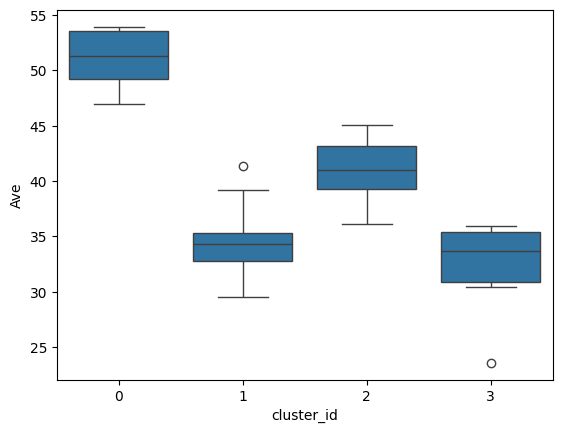

In [37]:
sns.boxplot(x='cluster_id', y='Ave', data=cricket)

<Axes: xlabel='cluster_id', ylabel='SR'>

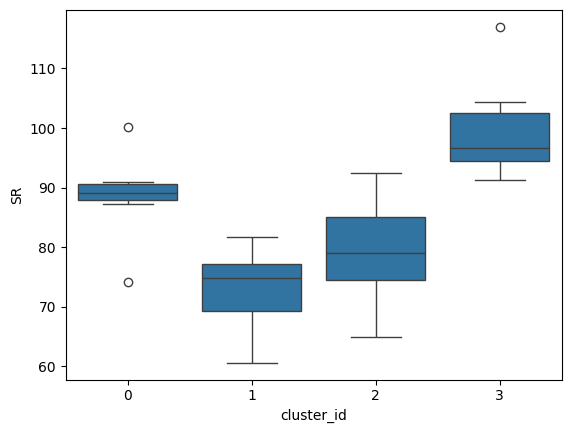

In [38]:
sns.boxplot(x='cluster_id', y='SR', data=cricket)

## Finding the Optimal Number of Clusters

### SSD

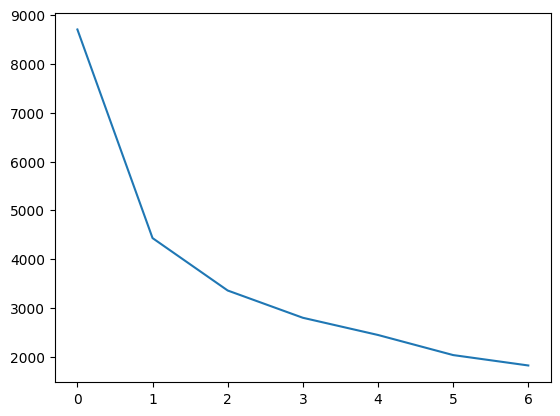

In [29]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [36]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.4025940739563748
For n_clusters=3, the silhouette score is 0.5084896296141937
For n_clusters=4, the silhouette score is 0.4777820100216849
For n_clusters=5, the silhouette score is 0.4142855980014991
For n_clusters=6, the silhouette score is 0.41766147997150216
For n_clusters=7, the silhouette score is 0.4147534488469224
For n_clusters=8, the silhouette score is 0.39609381883999467


In [31]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [32]:
kmeans.labels_

array([1, 2, 0, ..., 1, 0, 0], dtype=int32)

In [33]:
# assign the label
grouped_df['cluster_id'] = kmeans.labels_
grouped_df.head()

,CustomerID,amount,frequency,recency,cluster_id
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,2
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,1


<Axes: xlabel='cluster_id', ylabel='amount'>

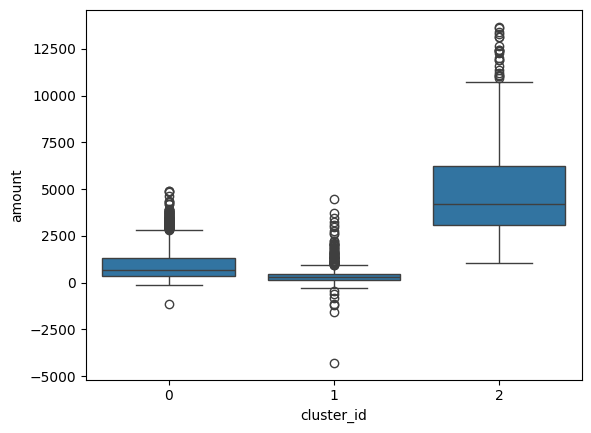

In [37]:
# plot
sns.boxplot(x='cluster_id', y='amount', data=grouped_df)

<Axes: xlabel='cluster_id', ylabel='recency'>

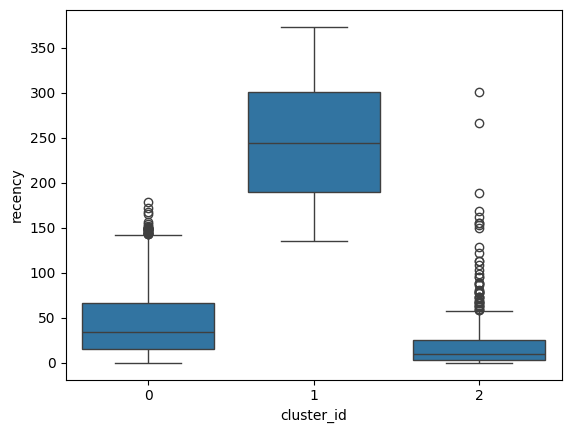

In [38]:
sns.boxplot(x='cluster_id', y='recency', data=grouped_df)

<Axes: xlabel='cluster_id', ylabel='frequency'>

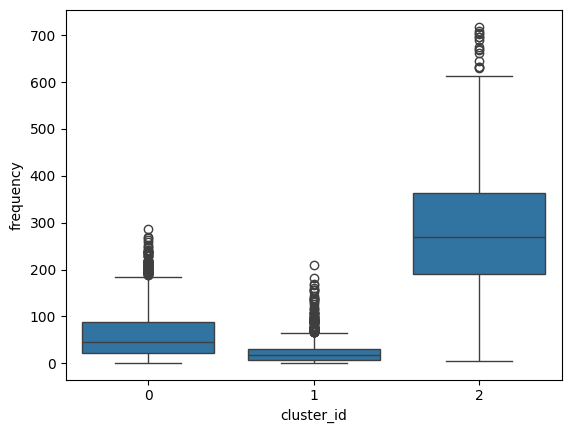

In [39]:
sns.boxplot(x='cluster_id', y='frequency', data=grouped_df)

## Hierarchical Clustering

In [40]:
rfm_df_scaled.head()

,amount,frequency,recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


In [407]:
grouped_df.head()

,CustomerID,amount,frequency,recency,cluster_id
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,1
3,12349.0,1757.55,73,18,1
4,12350.0,334.40,17,309,2


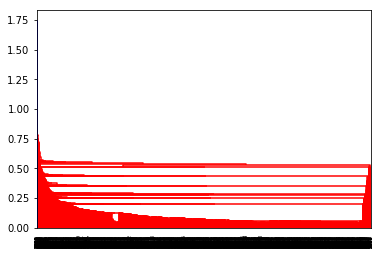

In [408]:
# single linkage
mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

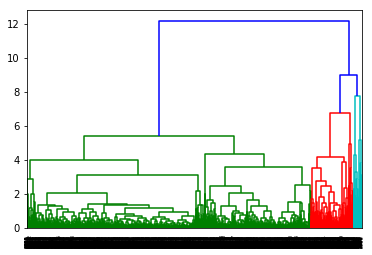

In [409]:
# complete linkage
mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [415]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 0, ..., 0, 0, 0])

In [416]:
# assign cluster labels
grouped_df['cluster_labels'] = cluster_labels
grouped_df.head()

,CustomerID,amount,frequency,recency,cluster_id,cluster_labels
0,12346.0,0.00,2,325,2,0
1,12347.0,4310.00,182,1,0,1
2,12348.0,1797.24,31,74,1,0
3,12349.0,1757.55,73,18,1,0
4,12350.0,334.40,17,309,2,0


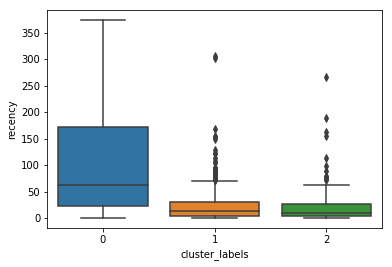

In [419]:
# plots
sns.boxplot(x='cluster_labels', y='recency', data=grouped_df)

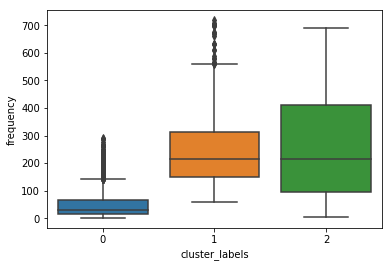

In [420]:
# plots
sns.boxplot(x='cluster_labels', y='frequency', data=grouped_df)

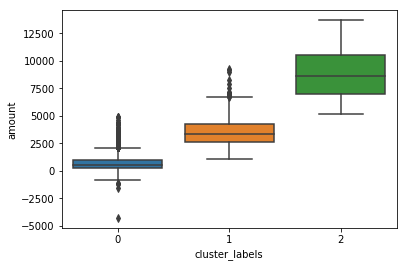

In [421]:
# plots
sns.boxplot(x='cluster_labels', y='amount', data=grouped_df)